<a href="https://colab.research.google.com/github/siraj1805/Premier-League/blob/main/premier_league.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#  Premier League Match Analysis – CSV Version
#  Siraj | 2025

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [7]:
# Step 1: Loading the CSV file
df = pd.read_csv("matches.csv")


# Step 2: Preview and clean the data
# Check if column names need to be renamed (adjust if needed)
df.columns = [col.strip() for col in df.columns]  # Remove leading/trailing spaces
df = df[["Date", "Day", "Home", "Score", "Away"]]  # Use correct column names based on CSV
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Score"] = df["Score"].astype(str)


# Step 3: Extract Home and Away Goals
df[['HomeGoals', 'AwayGoals']] = df['Score'].str.split('–', expand=True)
df['HomeGoals'] = pd.to_numeric(df['HomeGoals'], errors='coerce').fillna(0).astype(int)
df['AwayGoals'] = pd.to_numeric(df['AwayGoals'], errors='coerce').fillna(0).astype(int)

# Total goals scored at home
home_goals = df.groupby("Home")["HomeGoals"].sum().reset_index()
home_goals.columns = ["Team", "HomeGoals"]

# Total goals scored away
away_goals = df.groupby("Away")["AwayGoals"].sum().reset_index()
away_goals.columns = ["Team", "AwayGoals"]

# Merge both
total_goals = pd.merge(home_goals, away_goals, on="Team", how="outer").fillna(0)
total_goals["TotalGoals"] = total_goals["HomeGoals"] + total_goals["AwayGoals"]

# Sort by most goals scored
total_goals = total_goals.sort_values("TotalGoals", ascending=False).reset_index(drop=True)

# Show top 10
print(total_goals)

# Drop rows with no valid scores
df = df.dropna(subset=["HomeGoals", "AwayGoals"])


# Step 4: Feature Engineering
df["Result"] = df.apply(
    lambda row: "Home Win" if row["HomeGoals"] > row["AwayGoals"]
    else "Away Win" if row["HomeGoals"] < row["AwayGoals"]
    else "Draw", axis=1)

df["GoalDiff"] = df["HomeGoals"] - df["AwayGoals"]

               Team  HomeGoals  AwayGoals  TotalGoals
0         Liverpool         42         44          86
1   Manchester City         43         29          72
2           Arsenal         35         34          69
3     Newcastle Utd         40         28          68
4         Brentford         40         26          66
5          Brighton         30         36          66
6           Chelsea         35         29          64
7         Tottenham         35         29          64
8       Bournemouth         23         35          58
9       Aston Villa         34         24          58
10  Nott'ham Forest         26         32          58
11           Fulham         27         27          54
12           Wolves         27         27          54
13   Crystal Palace         24         27          51
14         West Ham         23         23          46
15   Manchester Utd         23         21          44
16          Everton         26         16          42
17     Ipswich Town         

<ipython-input-7-403927806>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


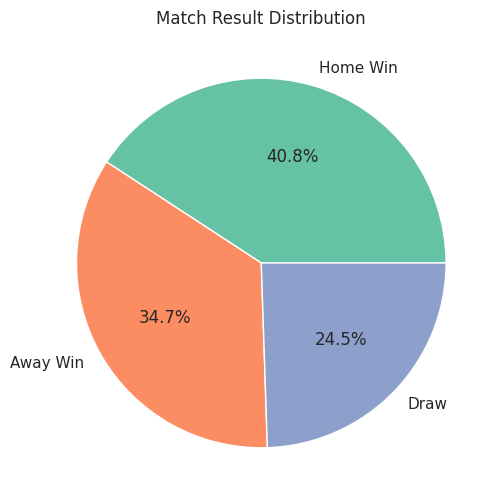

In [8]:
# Step 5: Visualizations

## 1. Match Result Distribution (Pie)
plt.figure(figsize=(6, 6))
df["Result"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Match Result Distribution")
plt.ylabel("")
plt.show()


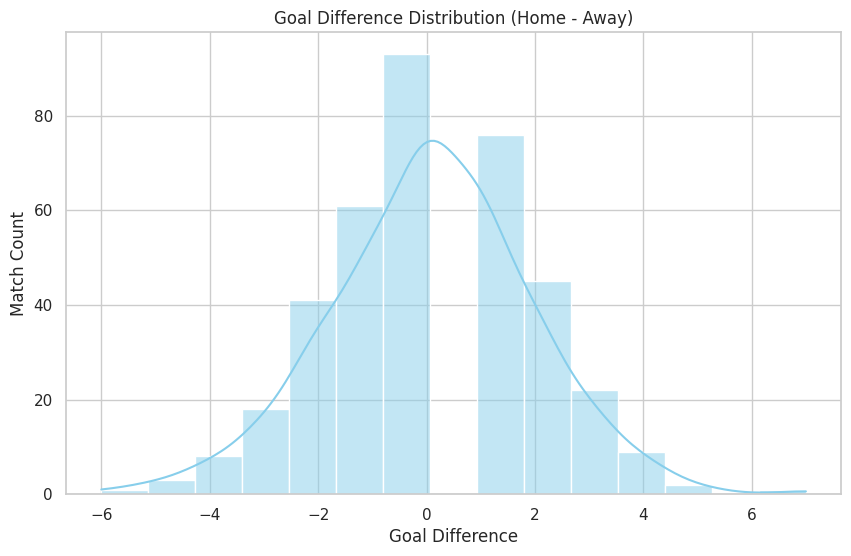

In [9]:
## 2. Goal Difference Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["GoalDiff"], bins=15, kde=True, color="skyblue")
plt.title("Goal Difference Distribution (Home - Away)")
plt.xlabel("Goal Difference")
plt.ylabel("Match Count")
plt.show()


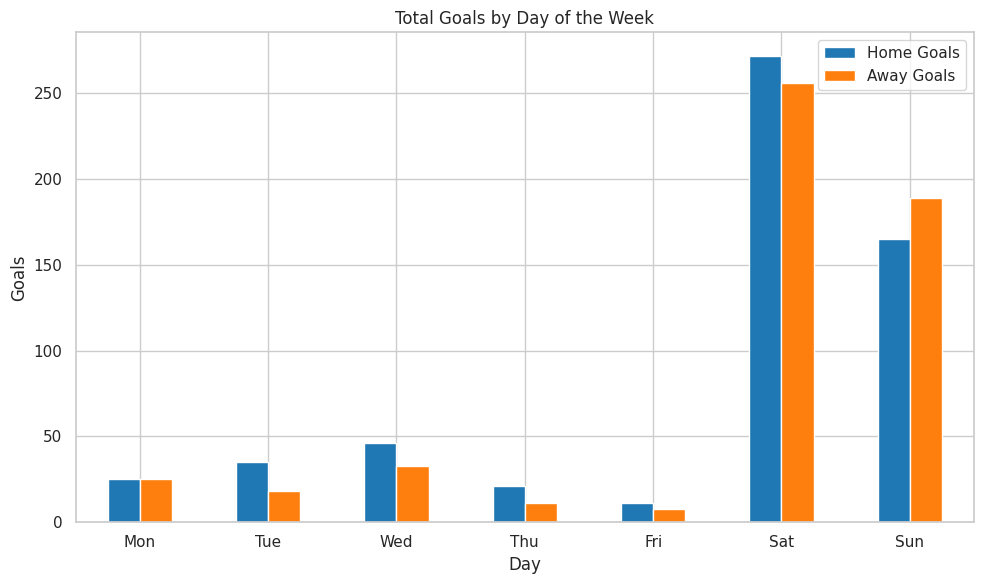

In [10]:
## 3. Goals by Day of the Week
goals_by_day = df.groupby("Day")[["HomeGoals", "AwayGoals"]].sum()
goals_by_day = goals_by_day.reindex(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])  # reorder

goals_by_day.plot(kind='bar', stacked=False, figsize=(10, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Total Goals by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Goals")
plt.xticks(rotation=0)
plt.legend(["Home Goals", "Away Goals"])
plt.tight_layout()
plt.show()

<ipython-input-11-3217245421>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Team", y="TotalGoals", data=total_goals, palette="Blues_d")


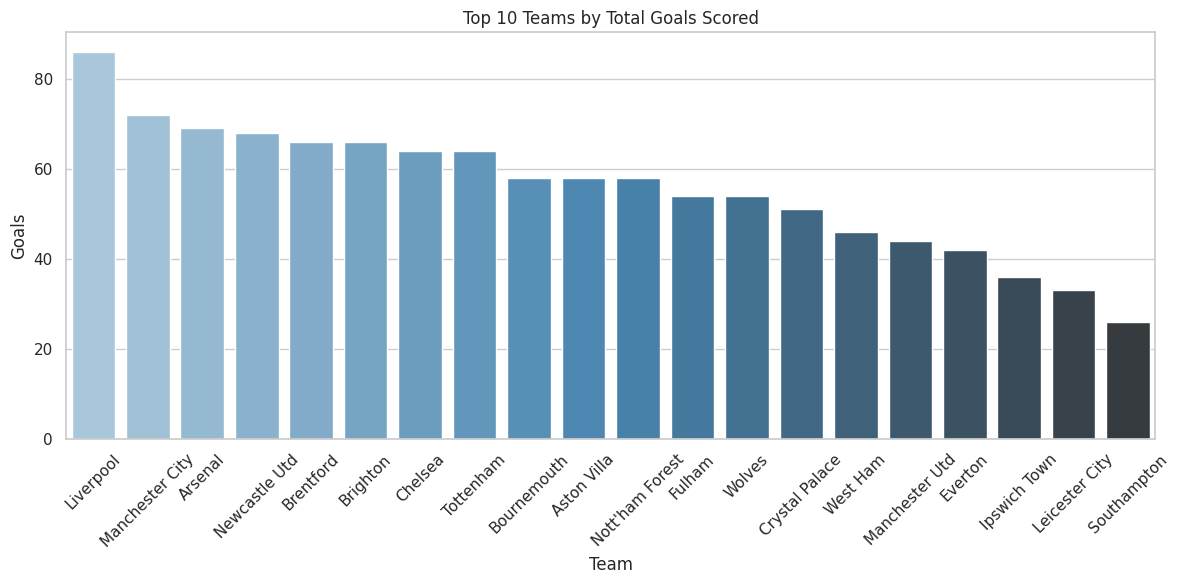

In [11]:
##Total goals scored by a Team
plt.figure(figsize=(12, 6))
sns.barplot(x="Team", y="TotalGoals", data=total_goals, palette="Blues_d")
plt.title("Top 10 Teams by Total Goals Scored")
plt.xticks(rotation=45)
plt.ylabel("Goals")
plt.tight_layout()
plt.show()


In [14]:
# ✅ Final Summary
print("\n🔎 Total Matches Analyzed:", len(df))
print("\n📊 Match Result Counts:\n", df["Result"].value_counts())


🔎 Total Matches Analyzed: 380

📊 Match Result Counts:
 Result
Home Win    155
Away Win    132
Draw         93
Name: count, dtype: int64


In [12]:
# ⚽ Liverpool 2024–25 Season Statistical Analysis

team = "Liverpool"  # Adjust if your dataset uses a different spelling

# 🔍 Filter Liverpool's matches (home or away)
liverpool_df = df[(df["Home"] == team) | (df["Away"] == team)].copy()

# 🎯 Calculate Goals For / Against
liverpool_df["GoalsFor"] = liverpool_df.apply(
    lambda row: row["HomeGoals"] if row["Home"] == team else row["AwayGoals"], axis=1)

liverpool_df["GoalsAgainst"] = liverpool_df.apply(
    lambda row: row["AwayGoals"] if row["Home"] == team else row["HomeGoals"], axis=1)

# 🧠 Determine Result from Liverpool’s perspective
liverpool_df["TeamResult"] = liverpool_df.apply(
    lambda row: "Win" if row["GoalsFor"] > row["GoalsAgainst"]
    else "Draw" if row["GoalsFor"] == row["GoalsAgainst"]
    else "Loss", axis=1)

# 📊 Aggregate Stats
matches = len(liverpool_df)
wins = (liverpool_df["TeamResult"] == "Win").sum()
draws = (liverpool_df["TeamResult"] == "Draw").sum()
losses = (liverpool_df["TeamResult"] == "Loss").sum()
goals_for = liverpool_df["GoalsFor"].sum()
goals_against = liverpool_df["GoalsAgainst"].sum()
goal_diff = goals_for - goals_against
win_percent = round((wins / matches) * 100, 2)
avg_goals = round(goals_for / matches, 2)
avg_conceded = round(goals_against / matches, 2)

# 📋 Display Summary
print(f"📊 Liverpool – 2024–25 Premier League Champion Stats")
print(f"Matches Played   : {matches}")
print(f"Wins             : {wins}")
print(f"Draws            : {draws}")
print(f"Losses           : {losses}")
print(f"Goals Scored     : {goals_for}")
print(f"Goals Conceded   : {goals_against}")
print(f"Goal Difference  : {goal_diff}")
print(f"Win Percentage   : {win_percent}%")
print(f"Avg Goals/Match  : {avg_goals}")
print(f"Avg Conceded/Match: {avg_conceded}")


📊 Liverpool – 2024–25 Premier League Champion Stats
Matches Played   : 38
Wins             : 25
Draws            : 9
Losses           : 4
Goals Scored     : 86
Goals Conceded   : 41
Goal Difference  : 45
Win Percentage   : 65.79%
Avg Goals/Match  : 2.26
Avg Conceded/Match: 1.08


<ipython-input-13-1712679100>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=liverpool_df, x="TeamResult", palette="Set3", order=["Win", "Draw", "Loss"])


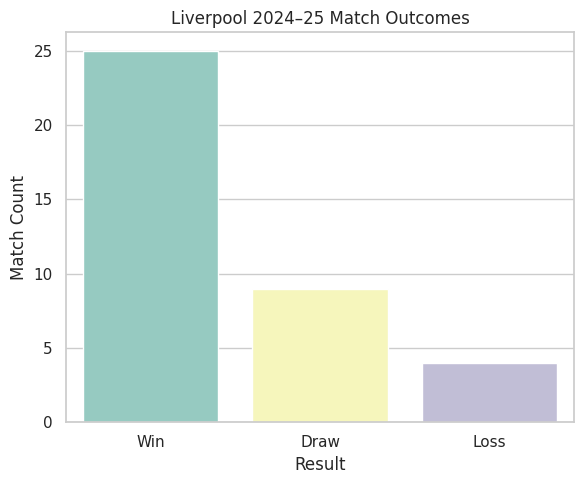

In [13]:
plt.figure(figsize=(6, 5))
sns.countplot(data=liverpool_df, x="TeamResult", palette="Set3", order=["Win", "Draw", "Loss"])
plt.title("Liverpool 2024–25 Match Outcomes")
plt.xlabel("Result")
plt.ylabel("Match Count")
plt.tight_layout()
plt.show()
